<a href="https://colab.research.google.com/github/intimanjunath/Neural-network-using-numpy-keras-pytorch-and-jax/blob/main/9_tensorflow_high_level_api_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

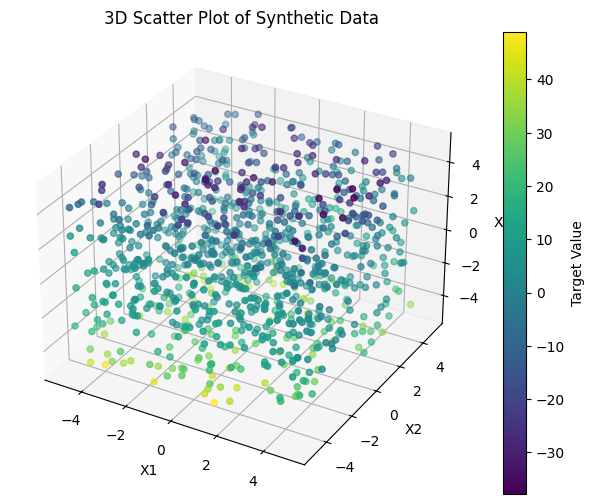

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=1000):
    # Generate three features uniformly in [-5, 5]
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)

    # Define a non-linear function and add noise:
    # Example: y = 2*sin(x1) + 0.5*x2^2 - 0.3*x3^3 + cos(x1*x2) + Gaussian noise
    noise = np.random.normal(0, 0.2, n_samples)
    y = 2 * np.sin(x1) + 0.5 * (x2**2) - 0.3 * (x3**3) + np.cos(x1 * x2) + noise

    # Stack the features into a single matrix
    X = np.column_stack((x1, x2, x3))
    return X.astype(np.float32), y.astype(np.float32)

# Generate synthetic dataset
X, y = generate_data(1000)

# Visualize the data in a 3D scatter plot (4th dimension by color)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.colorbar(sc, label='Target Value')
plt.title("3D Scatter Plot of Synthetic Data")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Set TensorFlow seed for reproducibility
tf.random.set_seed(42)

# Define the model using the Sequential API
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),  # First hidden layer with 64 neurons
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),                    # Second hidden layer with 32 neurons
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),                    # Third hidden layer with 16 neurons
    layers.Dense(1)                                         # Output layer (linear activation for regression)
])

# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary to verify the architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 223.8261 - mae: 10.9712 - val_loss: 244.4172 - val_mae: 11.6198
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 202.0587 - mae: 10.3202 - val_loss: 209.8339 - val_mae: 10.5708
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 166.1631 - mae: 9.1677 - val_loss: 156.1927 - val_mae: 8.9108
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 118.4951 - mae: 7.5293 - val_loss: 97.4230 - val_mae: 7.1777
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 69.2874 - mae: 6.1451 - val_loss: 63.5205 - val_mae: 6.3373
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 55.9305 - mae: 5.9561 - val_loss: 53.7427 - val_mae: 6.0296
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.4375 - mae: 5.9130 - val_loss: 47.4472 - val_mae: 5.5769
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 51.9790 - mae: 5.6176 - val_loss: 43.2199 - val_mae: 5.2601
Epoch 9/100
20/20 ━━━━━━━━━━━━━

In [5]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Display first 5 test predictions vs. actual values
print("\nFirst 5 Test Predictions vs. Actual:")
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.3f}, Actual: {y_test[i]:.3f}")

Test Loss (MSE): 6.6024, Test MAE: 1.8574
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

First 5 Test Predictions vs. Actual:
Predicted: 23.421, Actual: 22.773
Predicted: 3.903, Actual: 3.861
Predicted: 6.508, Actual: 5.340
Predicted: 0.764, Actual: -1.366
Predicted: 20.065, Actual: 19.533


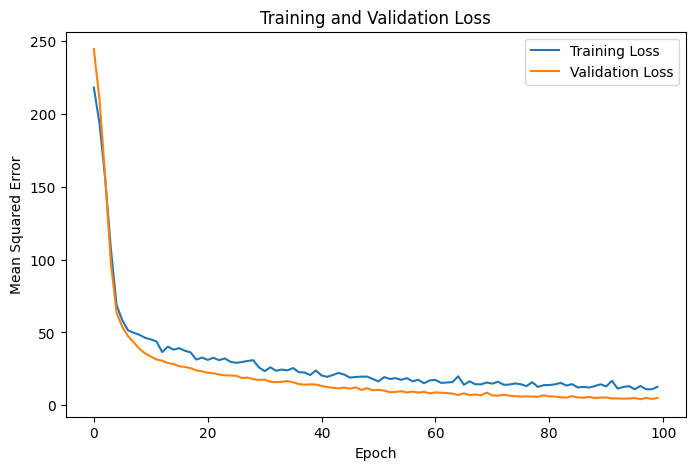

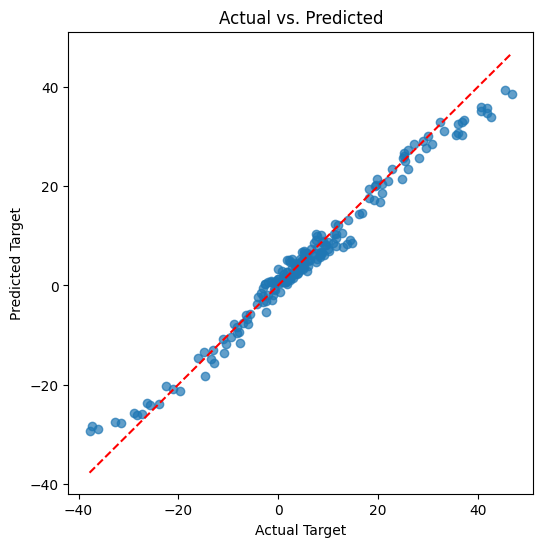

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot Actual vs. Predicted target values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title("Actual vs. Predicted")
plt.show()